In [1]:
import pandas as pd
import numpy as np

## Loading clean data

In [2]:
df = pd.read_csv('/Users/sandra/Desktop/Projects/air_clean_data.csv')
df.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,dateInt,date
0,2013,3,1,0,4.0,4.0,3.0,50.638586,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling,20130301,2013-03-01
1,2013,3,1,1,7.0,7.0,3.0,50.638586,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling,20130301,2013-03-01
2,2013,3,1,2,5.0,5.0,3.0,2.000000,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling,20130301,2013-03-01
3,2013,3,1,3,6.0,6.0,3.0,50.638586,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling,20130301,2013-03-01
4,2013,3,1,4,5.0,5.0,3.0,50.638586,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling,20130301,2013-03-01


In [3]:
df['dateInt']=df['year'].astype(str) + df['month'].astype(str).str.zfill(2)+ df['day'].astype(str).str.zfill(2)+df['hour'].astype(str).str.zfill(2)
df['Date'] = pd.to_datetime(df['dateInt'], format='%Y%m%d%H')
df['dateInt']=df['year'].astype(str) + df['month'].astype(str).str.zfill(2)+ df['day'].astype(str).str.zfill(2)
df['date'] = pd.to_datetime(df['dateInt'], format='%Y%m%d')

In [4]:
df.set_index('Date', inplace=True)
df.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,dateInt,date
Date,,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,2013,3,1,0,4.0,4.0,3.0,50.638586,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling,20130301,2013-03-01
2013-03-01 01:00:00,2013,3,1,1,7.0,7.0,3.0,50.638586,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling,20130301,2013-03-01
2013-03-01 02:00:00,2013,3,1,2,5.0,5.0,3.0,2.000000,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling,20130301,2013-03-01
2013-03-01 03:00:00,2013,3,1,3,6.0,6.0,3.0,50.638586,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling,20130301,2013-03-01
2013-03-01 04:00:00,2013,3,1,4,5.0,5.0,3.0,50.638586,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling,20130301,2013-03-01


In [5]:
#removing unnecesary columns
cols_to_drop = ['year', 'month', 'day', 'hour']
df = df.drop(cols_to_drop, axis = 1)

In [6]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

%matplotlib inline


In [7]:
df_daily = df.resample('D').mean()
df_daily.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
Date,,,,,,,,,,,
2013-03-01,7.326389,12.739583,9.232639,25.871867,417.013889,67.996528,1.173958,1026.569792,-20.148611,0.0,2.917708
2013-03-02,31.475694,40.760417,31.660656,56.599572,947.527778,32.621946,0.260417,1026.552778,-16.271875,0.0,1.145139
2013-03-03,79.291667,111.104167,49.239583,76.288572,1770.274306,22.788194,5.257292,1014.215278,-12.325347,0.0,1.463194
2013-03-04,22.309028,40.888889,18.764872,43.629349,729.118056,56.833333,9.610764,1017.263194,-12.773264,0.0,2.227083
2013-03-05,127.868056,159.236111,69.993056,100.719212,2015.364583,79.527778,6.630556,1010.551389,-7.916319,0.0,0.992014


In [8]:
df_weekly = df_daily.resample('W').mean()
df_weekly.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
Date,,,,,,,,,,,
2013-03-03,39.364583,54.868056,30.044293,52.920004,1044.938657,41.135556,2.230556,1022.445949,-16.248611,0.000000,1.842014
2013-03-10,127.499504,173.327381,54.273529,87.369242,1995.890873,71.200893,7.921974,1008.608036,-7.972123,0.000000,1.878720
2013-03-17,155.800595,165.871528,54.148313,83.345155,1748.444940,72.194444,6.276538,1013.946478,-3.122867,0.021280,1.480060
2013-03-24,61.516369,77.979167,16.282738,46.390180,881.646825,48.581252,4.453819,1009.503224,-6.526091,0.083978,2.288740
2013-03-31,101.655258,129.342510,31.971502,59.117498,1215.246032,40.110355,6.928819,1012.459077,-5.007341,0.000000,1.917163


## Setting up individual df's for each of the air pollutant needed for further analysis

In [9]:
pm25_rate = df_weekly[['PM2.5']]
pm25_rate

,PM2.5
Date,
2013-03-03,39.364583
2013-03-10,127.499504
2013-03-17,155.800595
2013-03-24,61.516369
2013-03-31,101.655258
...,...
2017-02-05,89.548750
2017-02-12,40.694492
2017-02-19,113.844524


In [10]:
pm10_rate = df_weekly[['PM10']]
pm10_rate

,PM10
Date,
2013-03-03,54.868056
2013-03-10,173.327381
2013-03-17,165.871528
2013-03-24,77.979167
2013-03-31,129.342510
...,...
2017-02-05,101.249989
2017-02-12,59.209602
2017-02-19,134.487164


In [11]:
SO2_rate = df_weekly[['SO2']]
SO2_rate

,SO2
Date,
2013-03-03,30.044293
2013-03-10,54.273529
2013-03-17,54.148313
2013-03-24,16.282738
2013-03-31,31.971502
...,...
2017-02-05,25.772946
2017-02-12,14.333871
2017-02-19,23.822536


In [12]:
NO2_rate = df_weekly[['NO2']]
NO2_rate

,NO2
Date,
2013-03-03,52.920004
2013-03-10,87.369242
2013-03-17,83.345155
2013-03-24,46.390180
2013-03-31,59.117498
...,...
2017-02-05,49.147147
2017-02-12,37.024537
2017-02-19,69.000795


In [13]:
CO_rate = df_weekly[['CO']]
CO_rate

,CO
Date,
2013-03-03,1044.938657
2013-03-10,1995.890873
2013-03-17,1748.444940
2013-03-24,881.646825
2013-03-31,1215.246032
...,...
2017-02-05,1334.751900
2017-02-12,855.727203
2017-02-19,1664.220110


In [14]:
O3_rate = df_weekly[['O3']]
O3_rate

,O3
Date,
2013-03-03,41.135556
2013-03-10,71.200893
2013-03-17,72.194444
2013-03-24,48.581252
2013-03-31,40.110355
...,...
2017-02-05,48.824107
2017-02-12,55.584571
2017-02-19,38.652903


In [15]:
from fbprophet import Prophet
import logging

logging.getLogger().setLevel(logging.ERROR)

## Transforming df's ready for Prophet modeling 

Prophet imposes the strict condition that the input columns be named ds (the time column) and y (the metric column), therefore columns within our DataFrame has to be renamed

## Particulate matter 2.5 - PM2.5 modeling

In [16]:
df_pm25 = pm25_rate.reset_index()
df_pm25.columns = ['ds', 'y']
df_pm25.head()

,ds,y
0,2013-03-03,39.364583
1,2013-03-10,127.499504
2,2013-03-17,155.800595
3,2013-03-24,61.516369
4,2013-03-31,101.655258


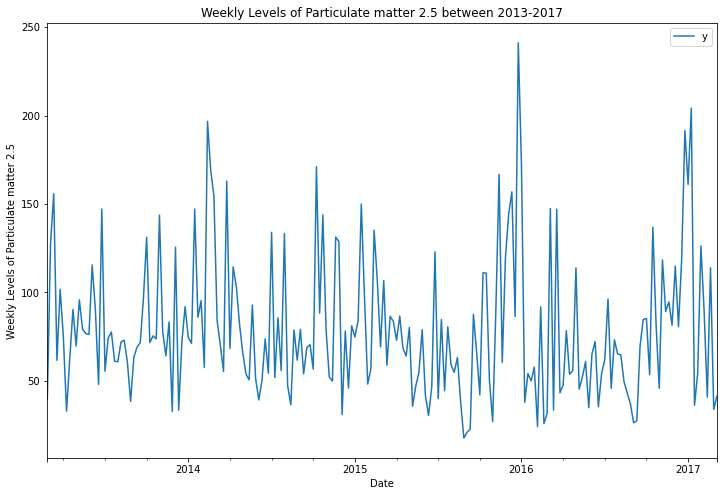

In [17]:
#looking at the data before forecasting
ax = df_pm25.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Weekly Levels of Particulate matter 2.5')
ax.set_xlabel('Date')
ax.set_title('Weekly Levels of Particulate matter 2.5 between 2013-2017')

plt.show()

In [18]:
prediction_size = 30
df_train = df_pm25[:-prediction_size]

In [19]:
model = Prophet(weekly_seasonality=True)
model.fit(df_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [20]:
future = model.make_future_dataframe(periods=156, freq='W')
future.tail()
#since we working with weekly data, periods has been set to forecast for further 156 weeks( equal to 3 years)
#looking at the tail to ensure predictive years has been produced

,ds
331,2019-07-07
332,2019-07-14
333,2019-07-21
334,2019-07-28
335,2019-08-04


In [21]:
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-03-03,51.311370,62.061768,146.660897,51.311370,51.311370,54.758673,54.758673,54.758673,35.950252,35.950252,35.950252,18.808421,18.808421,18.808421,0.0,0.0,0.0,106.070043
1,2013-03-10,51.217626,56.704950,143.316550,51.217626,51.217626,50.670595,50.670595,50.670595,35.950252,35.950252,35.950252,14.720343,14.720343,14.720343,0.0,0.0,0.0,101.888221
2,2013-03-17,51.123882,55.425576,140.765469,51.123882,51.123882,47.213692,47.213692,47.213692,35.950252,35.950252,35.950252,11.263439,11.263439,11.263439,0.0,0.0,0.0,98.337574
3,2013-03-24,51.030139,49.122495,135.991395,51.030139,51.030139,43.102797,43.102797,43.102797,35.950252,35.950252,35.950252,7.152545,7.152545,7.152545,0.0,0.0,0.0,94.132936
4,2013-03-31,50.936395,46.159935,133.684394,50.936395,50.936395,38.201030,38.201030,38.201030,35.950252,35.950252,35.950252,2.250777,2.250777,2.250777,0.0,0.0,0.0,89.137425


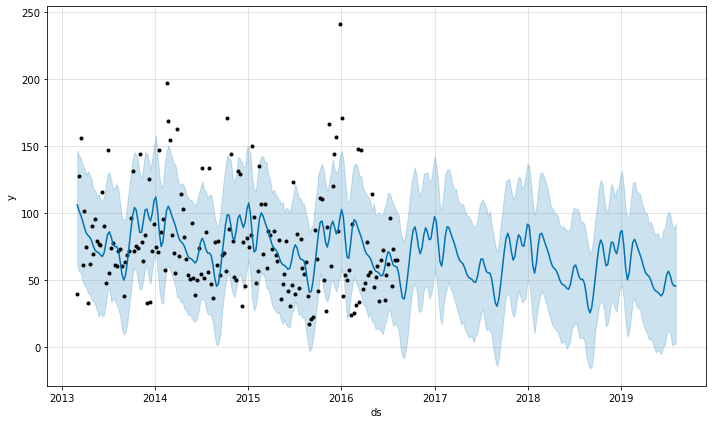

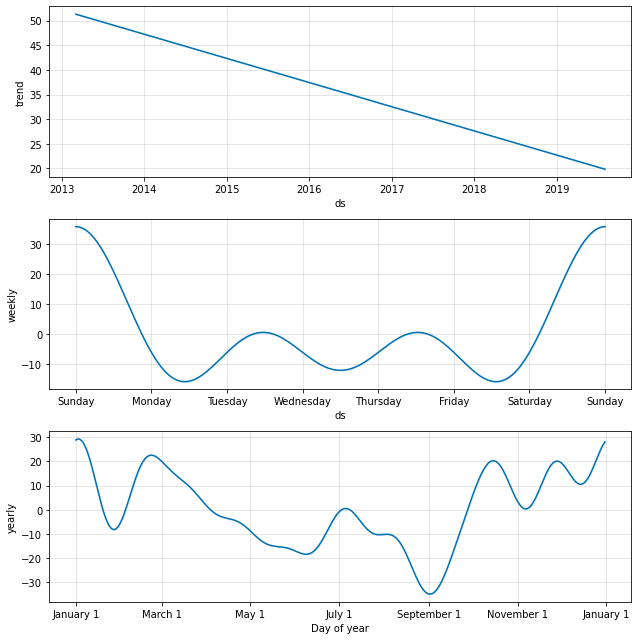

In [22]:
model.plot(forecast)
model.plot_components(forecast);

Prophet returns data frame with many interesting columns, but below function provides the subset columns most relevant to forecasting, which are:

* ds: the datestamp 
* yhat: the forecasted value of our metric/ predicted values of a value y
* yhat_lower: the lower bound of the forecasts
* yhat_upper: the upper bound of the forecasts

In [23]:
def forecasting_df(df,forecast):
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(df.set_index('ds')['y'])

future = forecasting_df(df_pm25, forecast)
future.head()

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2013-03-03,106.070043,62.061768,146.660897,39.364583
2013-03-10,101.888221,56.704950,143.316550,127.499504
2013-03-17,98.337574,55.425576,140.765469,155.800595
2013-03-24,94.132936,49.122495,135.991395,61.516369
2013-03-31,89.137425,46.159935,133.684394,101.655258


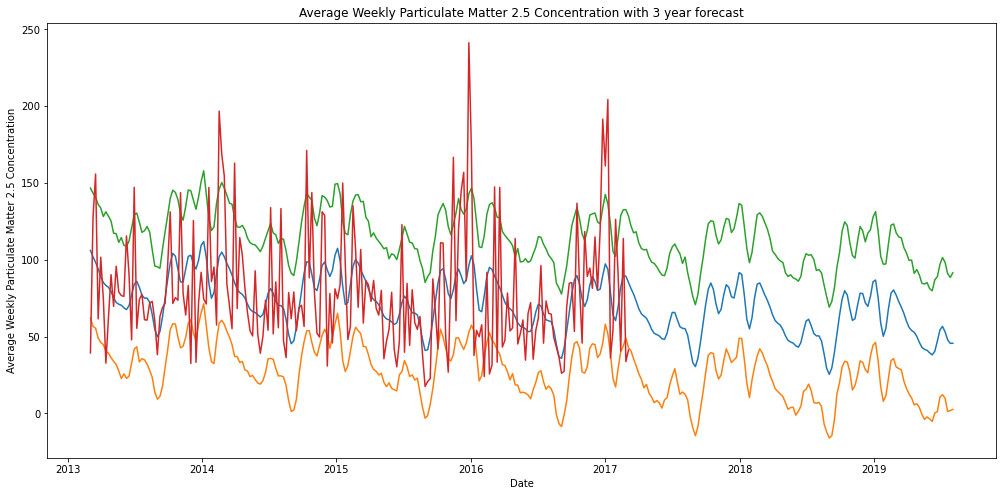

In [24]:
plt.figure(figsize=(17, 8))
plt.plot(future['yhat'])
plt.plot(future['yhat_lower'])
plt.plot(future['yhat_upper'])
plt.plot(future['y'])
plt.xlabel('Date')
plt.ylabel('Average Weekly Particulate Matter 2.5 Concentration')
plt.title('Average Weekly Particulate Matter 2.5 Concentration with 3 year forecast')
plt.grid(False)
plt.show()

## Particulate matter 10 - PM10 modeling

In [25]:
df_pm10 = pm10_rate.reset_index()
df_pm10.columns = ['ds', 'y']
df_pm10.head()

,ds,y
0,2013-03-03,54.868056
1,2013-03-10,173.327381
2,2013-03-17,165.871528
3,2013-03-24,77.979167
4,2013-03-31,129.342510


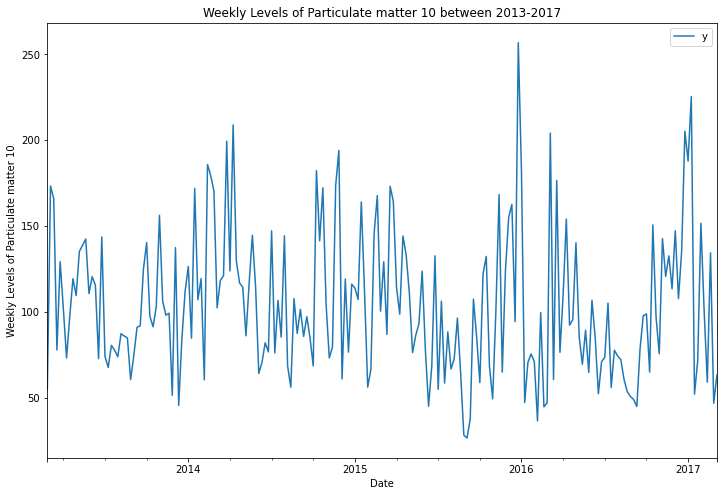

In [26]:
ax = df_pm10.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Weekly Levels of Particulate matter 10')
ax.set_xlabel('Date')
ax.set_title('Weekly Levels of Particulate matter 10 between 2013-2017')

plt.show()

In [27]:
prediction_size = 30
df_train2 = df_pm10[:-prediction_size]

In [28]:
model2 = Prophet()
model2.fit(df_train2)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [29]:
future2 = model2.make_future_dataframe(periods=156, freq='W')
future2.tail()

,ds
331,2019-07-07
332,2019-07-14
333,2019-07-21
334,2019-07-28
335,2019-08-04


In [30]:
forecast2 = model2.predict(future2)
forecast2.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-03-03,112.762784,85.132862,175.493478,112.762784,112.762784,19.997308,19.997308,19.997308,19.997308,19.997308,19.997308,0.0,0.0,0.0,132.760091
1,2013-03-10,112.664621,92.870135,182.845866,112.664621,112.664621,22.866171,22.866171,22.866171,22.866171,22.866171,22.866171,0.0,0.0,0.0,135.530791
2,2013-03-17,112.566458,95.435717,178.381389,112.566458,112.566458,25.150865,25.150865,25.150865,25.150865,25.150865,25.150865,0.0,0.0,0.0,137.717323
3,2013-03-24,112.468295,94.422330,184.211503,112.468295,112.468295,25.505188,25.505188,25.505188,25.505188,25.505188,25.505188,0.0,0.0,0.0,137.973482
4,2013-03-31,112.370132,94.969973,180.791426,112.370132,112.370132,24.589733,24.589733,24.589733,24.589733,24.589733,24.589733,0.0,0.0,0.0,136.959864


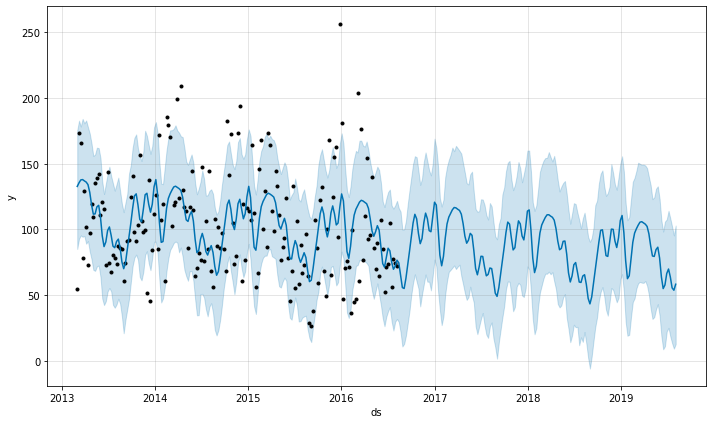

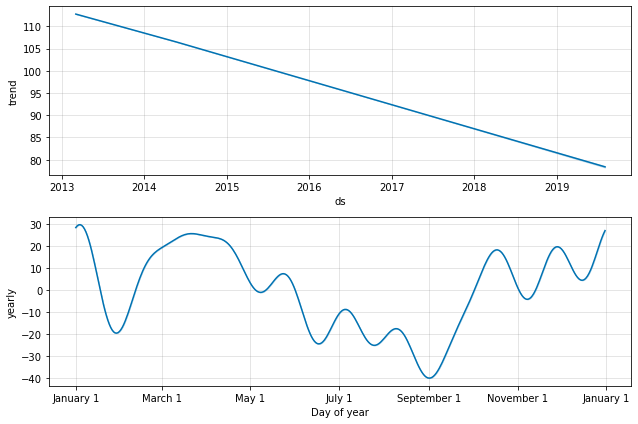

In [31]:
model2.plot(forecast2)
model2.plot_components(forecast2);

In [32]:
def make_comparison_dataframe(historical, forecast2):
    return forecast2.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))

cmp_df2 = make_comparison_dataframe(df_pm10, forecast2)

cmp_df2.head()

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2013-03-03,132.760091,85.132862,175.493478,54.868056
2013-03-10,135.530791,92.870135,182.845866,173.327381
2013-03-17,137.717323,95.435717,178.381389,165.871528
2013-03-24,137.973482,94.422330,184.211503,77.979167
2013-03-31,136.959864,94.969973,180.791426,129.342510


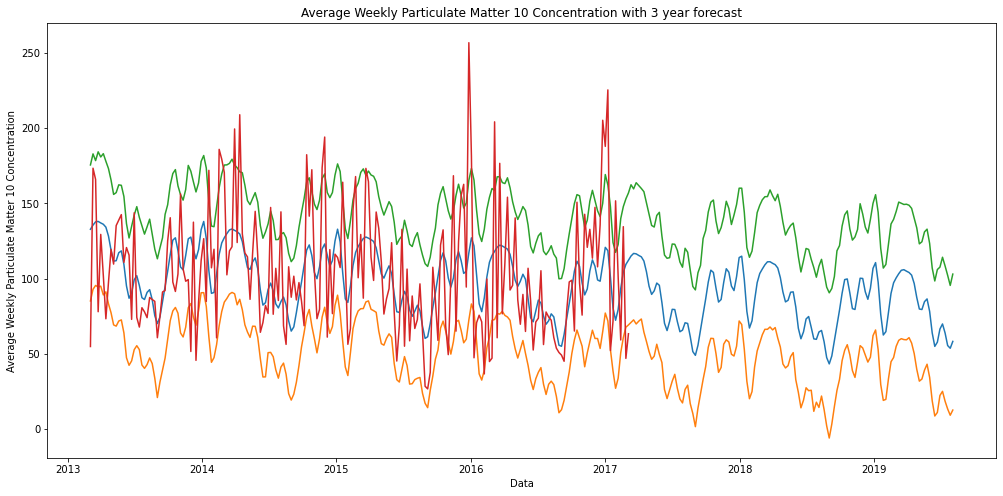

In [33]:
plt.figure(figsize=(17, 8))
plt.plot(cmp_df2['yhat'])
plt.plot(cmp_df2['yhat_lower'])
plt.plot(cmp_df2['yhat_upper'])
plt.plot(cmp_df2['y'])
plt.xlabel('Data')
plt.ylabel('Average Weekly Particulate Matter 10 Concentration')
plt.title('Average Weekly Particulate Matter 10 Concentration with 3 year forecast')
plt.grid(False)
plt.show()

## Sulfur dioxide - SO2 modeling

In [34]:
df_SO2 = SO2_rate.reset_index()
df_SO2.columns = ['ds', 'y']
df_SO2.head()

,ds,y
0,2013-03-03,30.044293
1,2013-03-10,54.273529
2,2013-03-17,54.148313
3,2013-03-24,16.282738
4,2013-03-31,31.971502


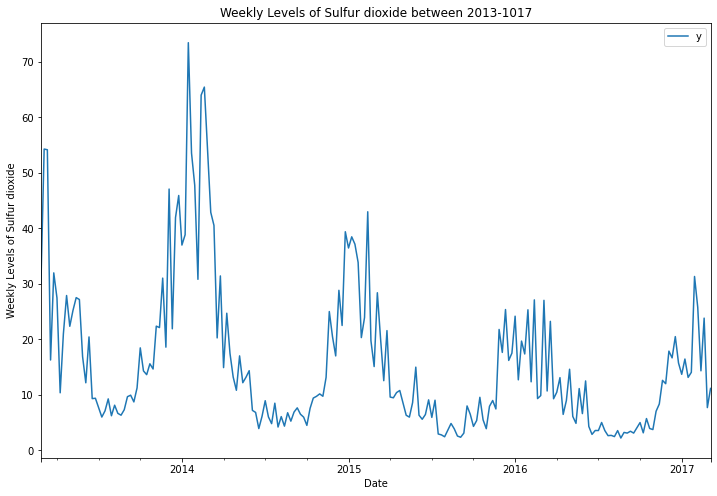

In [35]:
ax = df_SO2.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Weekly Levels of Sulfur dioxide')
ax.set_xlabel('Date')
ax.set_title('Weekly Levels of Sulfur dioxide between 2013-1017')

plt.show()

In [36]:
prediction_size = 30
df_train3 = df_SO2[:-prediction_size]

In [37]:
model3 = Prophet()
model3.fit(df_train3)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [38]:
future3 = model3.make_future_dataframe(periods=156, freq='W')
future3.tail()

,ds
331,2019-07-07
332,2019-07-14
333,2019-07-21
334,2019-07-28
335,2019-08-04


In [39]:
forecast3 = model3.predict(future3)

In [40]:
forecast3.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-03-03,26.653090,33.979047,53.212479,26.653090,26.653090,16.587573,16.587573,16.587573,16.587573,16.587573,16.587573,0.0,0.0,0.0,43.240663
1,2013-03-10,26.544018,31.529585,50.389800,26.544018,26.544018,14.558284,14.558284,14.558284,14.558284,14.558284,14.558284,0.0,0.0,0.0,41.102301
2,2013-03-17,26.434945,27.781949,46.341561,26.434945,26.434945,10.448667,10.448667,10.448667,10.448667,10.448667,10.448667,0.0,0.0,0.0,36.883612
3,2013-03-24,26.325873,22.674885,40.661546,26.325873,26.325873,5.333761,5.333761,5.333761,5.333761,5.333761,5.333761,0.0,0.0,0.0,31.659634
4,2013-03-31,26.216801,17.980413,36.448369,26.216801,26.216801,0.924935,0.924935,0.924935,0.924935,0.924935,0.924935,0.0,0.0,0.0,27.141736


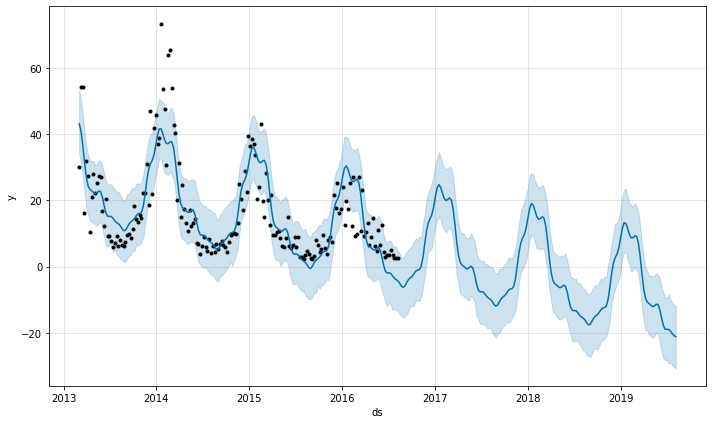

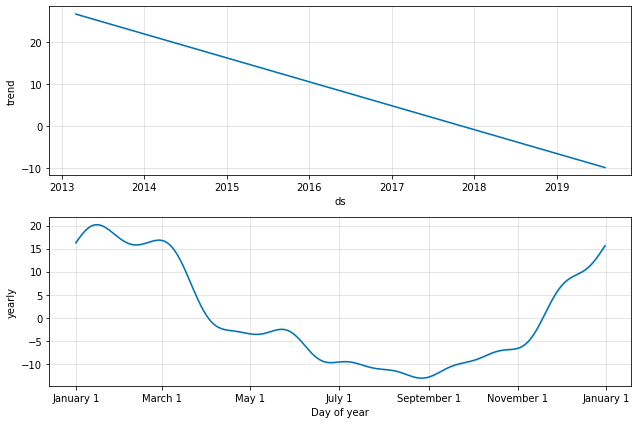

In [41]:
model3.plot(forecast3)
model3.plot_components(forecast3);

In [42]:
def make_comparison_dataframe(historical, forecast3):
    return forecast3.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))

cmp_df3 = make_comparison_dataframe(df_SO2, forecast3)

cmp_df3.head()

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2013-03-03,43.240663,33.979047,53.212479,30.044293
2013-03-10,41.102301,31.529585,50.389800,54.273529
2013-03-17,36.883612,27.781949,46.341561,54.148313
2013-03-24,31.659634,22.674885,40.661546,16.282738
2013-03-31,27.141736,17.980413,36.448369,31.971502


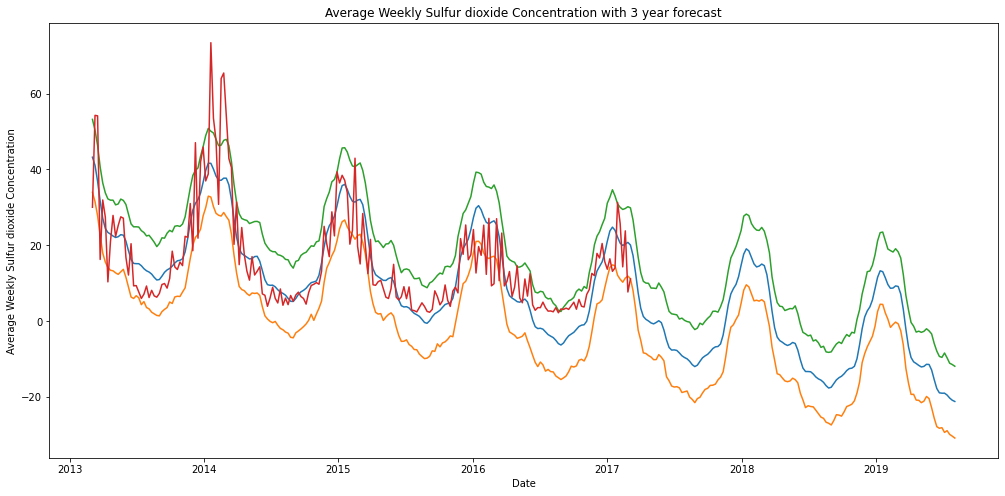

In [43]:
plt.figure(figsize=(17, 8))
plt.plot(cmp_df3['yhat'])
plt.plot(cmp_df3['yhat_lower'])
plt.plot(cmp_df3['yhat_upper'])
plt.plot(cmp_df3['y'])
plt.xlabel('Date')
plt.ylabel('Average Weekly Sulfur dioxide Concentration')
plt.title('Average Weekly Sulfur dioxide Concentration with 3 year forecast')
plt.grid(False)
plt.show()

## Nitrous dioxide - NO2 modeling

In [44]:
df_NO2 = NO2_rate.reset_index()
df_NO2.columns = ['ds', 'y']
df_NO2.head()

,ds,y
0,2013-03-03,52.920004
1,2013-03-10,87.369242
2,2013-03-17,83.345155
3,2013-03-24,46.390180
4,2013-03-31,59.117498


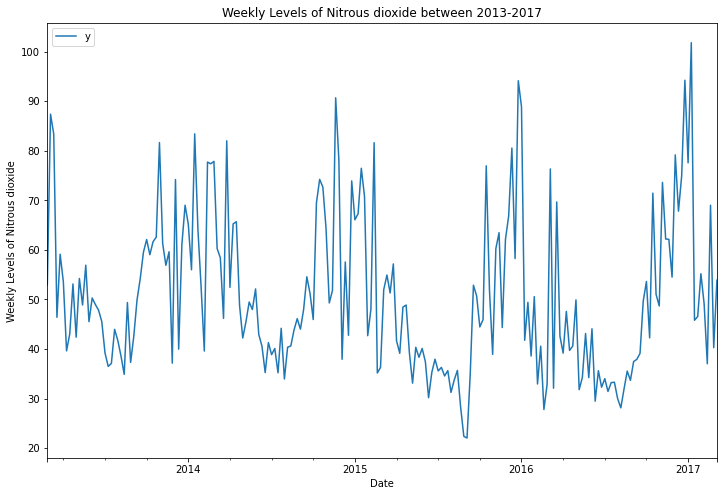

In [45]:
ax = df_NO2.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Weekly Levels of Nitrous dioxide')
ax.set_xlabel('Date')
ax.set_title('Weekly Levels of Nitrous dioxide between 2013-2017')

plt.show()

In [46]:
prediction_size = 30
df_train4 = df_NO2[:-prediction_size]

In [47]:
model4 = Prophet()
model4.fit(df_train4)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [48]:
future4 = model4.make_future_dataframe(periods=156, freq='W')
future4.tail()

,ds
331,2019-07-07
332,2019-07-14
333,2019-07-21
334,2019-07-28
335,2019-08-04


In [49]:
forecast4 = model4.predict(future4)
forecast4.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-03-03,57.467010,50.638053,77.429585,57.467010,57.467010,6.326965,6.326965,6.326965,6.326965,6.326965,6.326965,0.0,0.0,0.0,63.793974
1,2013-03-10,57.388560,52.720821,80.825759,57.388560,57.388560,9.554275,9.554275,9.554275,9.554275,9.554275,9.554275,0.0,0.0,0.0,66.942836
2,2013-03-17,57.310111,52.566831,79.765382,57.310111,57.310111,9.539889,9.539889,9.539889,9.539889,9.539889,9.539889,0.0,0.0,0.0,66.850000
3,2013-03-24,57.231662,48.858571,76.953433,57.231662,57.231662,5.710269,5.710269,5.710269,5.710269,5.710269,5.710269,0.0,0.0,0.0,62.941931
4,2013-03-31,57.153213,45.530212,72.056307,57.153213,57.153213,0.886343,0.886343,0.886343,0.886343,0.886343,0.886343,0.0,0.0,0.0,58.039556


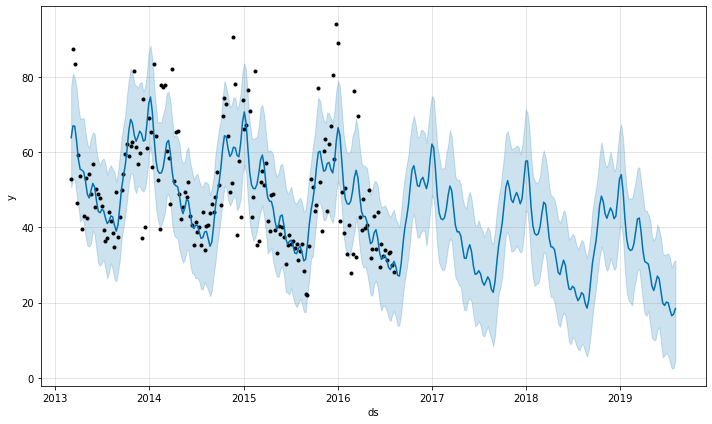

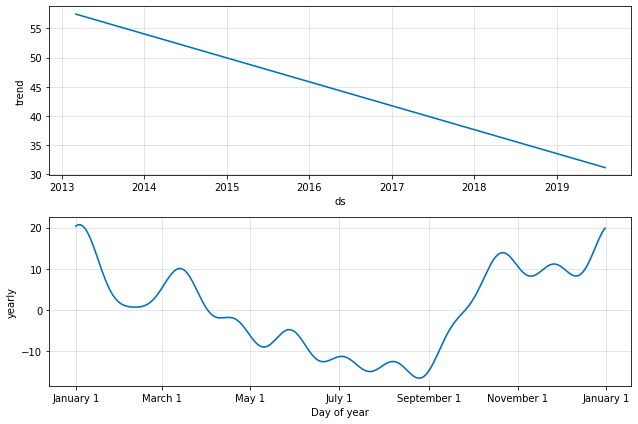

In [50]:
model4.plot(forecast4)
model4.plot_components(forecast4);

In [51]:
def make_comparison_dataframe(historical, forecast4):
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))

cmp_df4 = make_comparison_dataframe(df_NO2, forecast4)

cmp_df4.head()

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2013-03-03,106.070043,62.061768,146.660897,52.920004
2013-03-10,101.888221,56.704950,143.316550,87.369242
2013-03-17,98.337574,55.425576,140.765469,83.345155
2013-03-24,94.132936,49.122495,135.991395,46.390180
2013-03-31,89.137425,46.159935,133.684394,59.117498


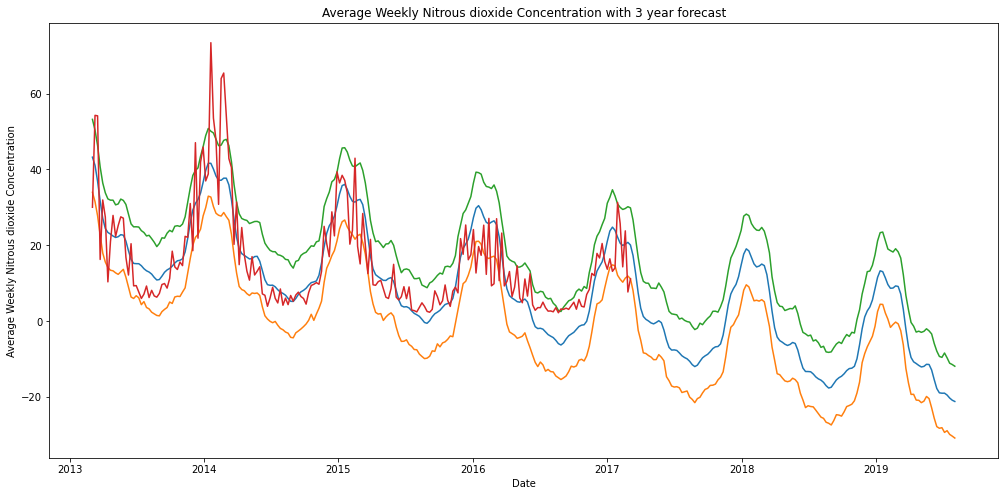

In [52]:
plt.figure(figsize=(17, 8))
plt.plot(cmp_df3['yhat'])
plt.plot(cmp_df3['yhat_lower'])
plt.plot(cmp_df3['yhat_upper'])
plt.plot(cmp_df3['y'])
plt.xlabel('Date')
plt.ylabel('Average Weekly Nitrous dioxide Concentration')
plt.title('Average Weekly Nitrous dioxide Concentration with 3 year forecast')
plt.grid(False)
plt.show()

## Carbon monoxide - CO modeling

In [53]:
df_CO = CO_rate.reset_index()
df_CO.columns = ['ds', 'y']
df_CO.head()

,ds,y
0,2013-03-03,1044.938657
1,2013-03-10,1995.890873
2,2013-03-17,1748.444940
3,2013-03-24,881.646825
4,2013-03-31,1215.246032


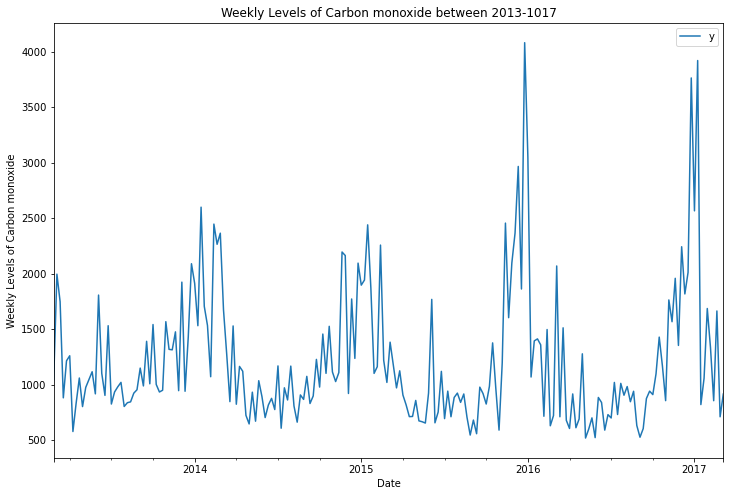

In [54]:
ax = df_CO.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Weekly Levels of Carbon monoxide')
ax.set_xlabel('Date')
ax.set_title('Weekly Levels of Carbon monoxide between 2013-1017')

plt.show()

In [55]:
prediction_size = 30
df_train5 = df_CO[:-prediction_size]

In [56]:
model5 = Prophet()
model5.fit(df_train5)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [57]:
future5 = model5.make_future_dataframe(periods=156, freq='W')
future5.tail()

,ds
331,2019-07-07
332,2019-07-14
333,2019-07-21
334,2019-07-28
335,2019-08-04


In [58]:
forecast5 = model5.predict(future5)
forecast5.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-03-03,1297.007061,1103.770990,2096.355853,1297.007061,1297.007061,314.919468,314.919468,314.919468,314.919468,314.919468,314.919468,0.0,0.0,0.0,1611.926529
1,2013-03-10,1296.016676,1044.592298,2010.829091,1296.016676,1296.016676,239.089265,239.089265,239.089265,239.089265,239.089265,239.089265,0.0,0.0,0.0,1535.105940
2,2013-03-17,1295.026290,903.346879,1849.114329,1295.026290,1295.026290,88.473949,88.473949,88.473949,88.473949,88.473949,88.473949,0.0,0.0,0.0,1383.500239
3,2013-03-24,1294.035905,710.166251,1706.034975,1294.035905,1294.035905,-98.546809,-98.546809,-98.546809,-98.546809,-98.546809,-98.546809,0.0,0.0,0.0,1195.489096
4,2013-03-31,1293.045520,501.947354,1545.881622,1293.045520,1293.045520,-250.976374,-250.976374,-250.976374,-250.976374,-250.976374,-250.976374,0.0,0.0,0.0,1042.069145


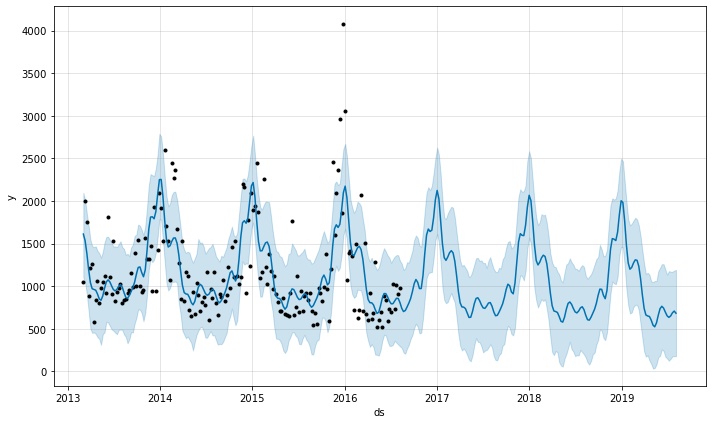

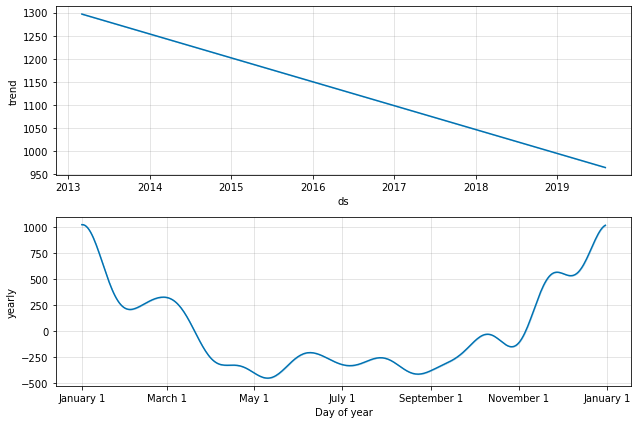

In [59]:
model5.plot(forecast5)
model5.plot_components(forecast5);

In [60]:
def make_comparison_dataframe(historical, forecast5):
    return forecast5.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))

cmp_df5 = make_comparison_dataframe(df_CO, forecast5)

cmp_df5.head()

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2013-03-03,1611.926529,1103.770990,2096.355853,1044.938657
2013-03-10,1535.105940,1044.592298,2010.829091,1995.890873
2013-03-17,1383.500239,903.346879,1849.114329,1748.444940
2013-03-24,1195.489096,710.166251,1706.034975,881.646825
2013-03-31,1042.069145,501.947354,1545.881622,1215.246032


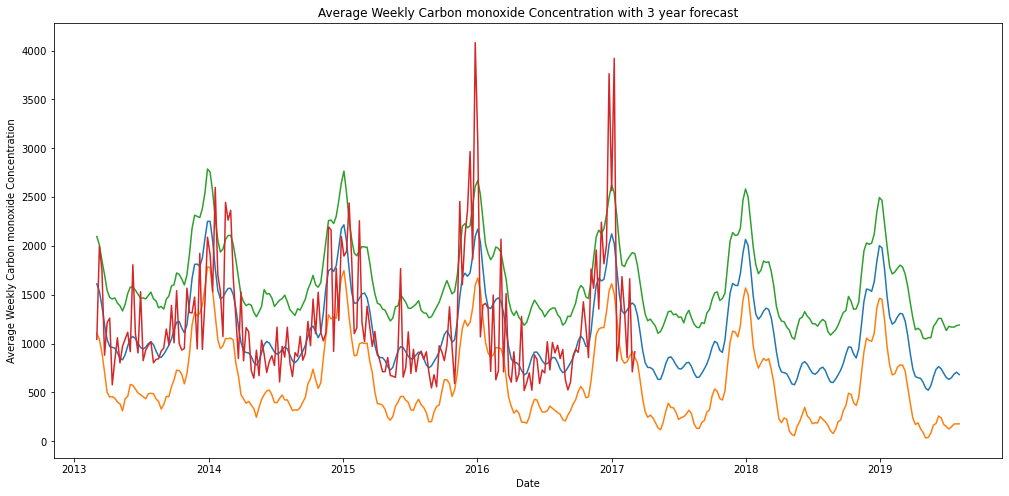

In [61]:
plt.figure(figsize=(17, 8))
plt.plot(cmp_df5['yhat'])
plt.plot(cmp_df5['yhat_lower'])
plt.plot(cmp_df5['yhat_upper'])
plt.plot(cmp_df5['y'])
plt.xlabel('Date')
plt.ylabel('Average Weekly Carbon monoxide Concentration')
plt.title('Average Weekly Carbon monoxide Concentration with 3 year forecast')
plt.grid(False)
plt.show()

## Ozone - O3 modeling

In [62]:
df_O3 = O3_rate.reset_index()
df_O3.columns = ['ds', 'y']
df_O3.head()

,ds,y
0,2013-03-03,41.135556
1,2013-03-10,71.200893
2,2013-03-17,72.194444
3,2013-03-24,48.581252
4,2013-03-31,40.110355


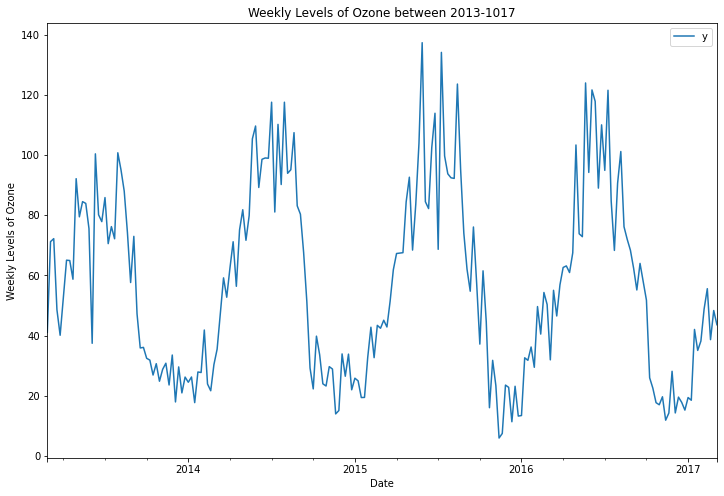

In [63]:
ax = df_O3.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Weekly Levels of Ozone')
ax.set_xlabel('Date')
ax.set_title('Weekly Levels of Ozone between 2013-1017')

plt.show()

In [64]:
prediction_size = 30
df_train6 = df_O3[:-prediction_size]

In [65]:
model6 = Prophet()
model6.fit(df_train6)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [66]:
future6 = model6.make_future_dataframe(periods=156, freq='W')
future6.tail()

,ds
331,2019-07-07
332,2019-07-14
333,2019-07-21
334,2019-07-28
335,2019-08-04


In [67]:
forecast6 = model6.predict(future6)
forecast6.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-03-03,51.910913,19.785076,52.236595,51.910913,51.910913,-16.184415,-16.184415,-16.184415,-16.184415,-16.184415,-16.184415,0.0,0.0,0.0,35.726498
1,2013-03-10,51.972284,28.278428,58.669555,51.972284,51.972284,-8.799858,-8.799858,-8.799858,-8.799858,-8.799858,-8.799858,0.0,0.0,0.0,43.172426
2,2013-03-17,52.033654,34.164993,65.486499,52.033654,52.033654,-3.040201,-3.040201,-3.040201,-3.040201,-3.040201,-3.040201,0.0,0.0,0.0,48.993453
3,2013-03-24,52.095024,34.998685,65.723323,52.095024,52.095024,-1.539502,-1.539502,-1.539502,-1.539502,-1.539502,-1.539502,0.0,0.0,0.0,50.555521
4,2013-03-31,52.156394,33.782872,65.890744,52.156394,52.156394,-1.557731,-1.557731,-1.557731,-1.557731,-1.557731,-1.557731,0.0,0.0,0.0,50.598663


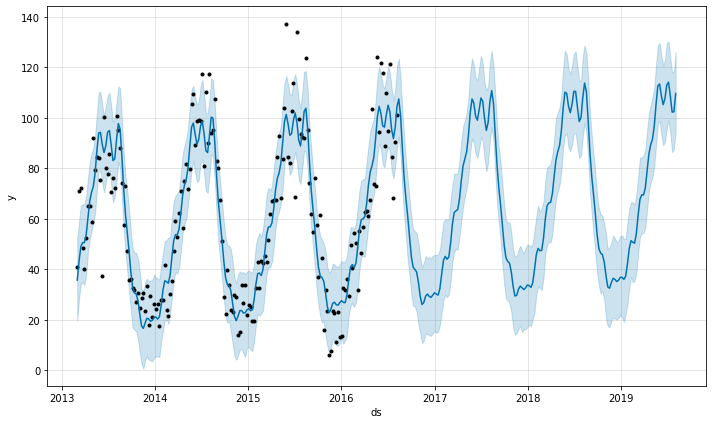

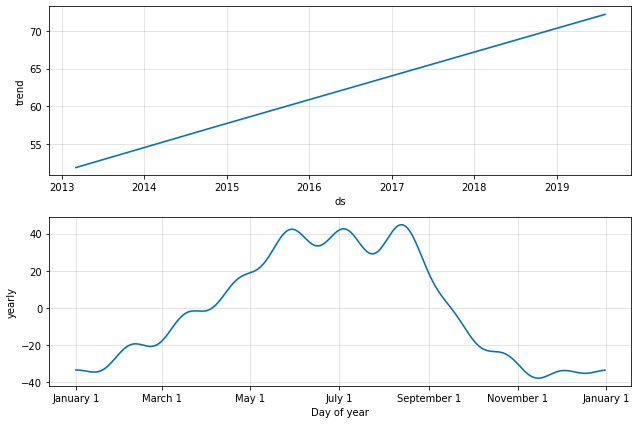

In [68]:
model6.plot(forecast6)
model6.plot_components(forecast6);

In [69]:
def make_comparison_dataframe(historical, forecast6):
    return forecast6.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))

cmp_df6 = make_comparison_dataframe(df_O3, forecast6)

cmp_df6.head()

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2013-03-03,35.726498,19.785076,52.236595,41.135556
2013-03-10,43.172426,28.278428,58.669555,71.200893
2013-03-17,48.993453,34.164993,65.486499,72.194444
2013-03-24,50.555521,34.998685,65.723323,48.581252
2013-03-31,50.598663,33.782872,65.890744,40.110355


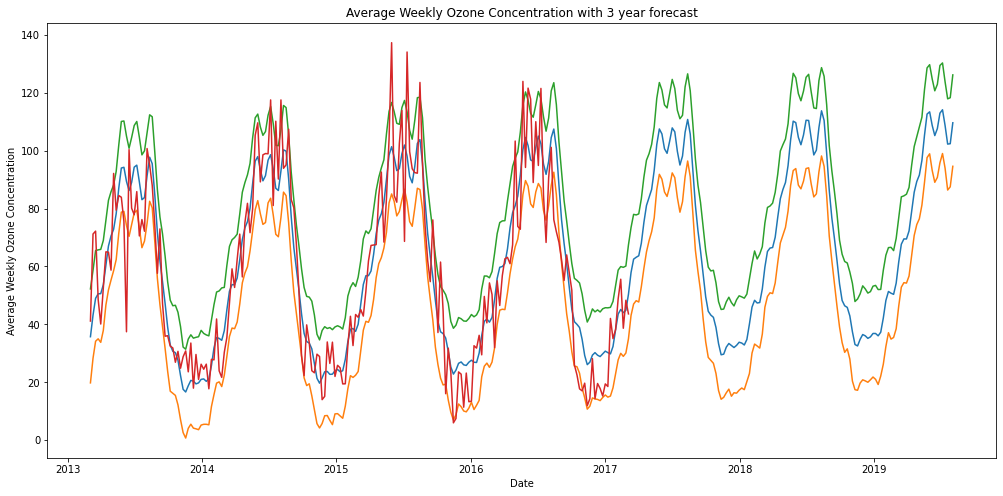

In [70]:
plt.figure(figsize=(17, 8))
plt.plot(cmp_df6['yhat'])
plt.plot(cmp_df6['yhat_lower'])
plt.plot(cmp_df6['yhat_upper'])
plt.plot(cmp_df6['y'])
plt.xlabel('Date')
plt.ylabel('Average Weekly Ozone Concentration')
plt.title('Average Weekly Ozone Concentration with 3 year forecast')
plt.grid(False)
plt.show()